In [1]:
import keras

Using TensorFlow backend.


In [2]:
import os
os.chdir('MRCNN_cell/Mask_RCNN-master')

In [3]:
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model as modellib
from mrcnn.model import log

In [4]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
import time
import concurrent.futures
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import imgaug
from imgaug import augmenters as iaa
import cv2

In [6]:
import tensorflow as tf
import skimage
from skimage.transform import resize

In [5]:
from samples.balloon import balloon

In [9]:
config = balloon.BalloonConfig()
CELL_DIR = 'D:\Segmentation_project\Final\MRCNN_all'
print(CELL_DIR)

D:\Segmentation_project\Final\MRCNN_all


In [10]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = balloon.BalloonDataset()
dataset.load_balloon(CELL_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 352
Class Count: 2
  0. BG                                                
  1. balloon                                           


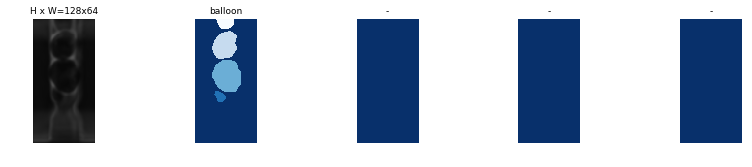

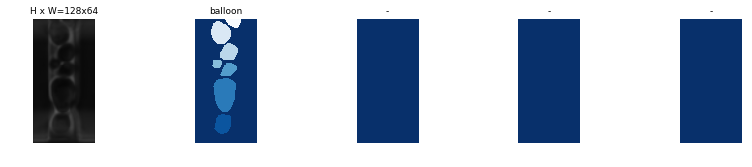

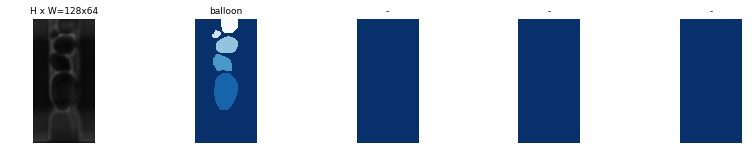

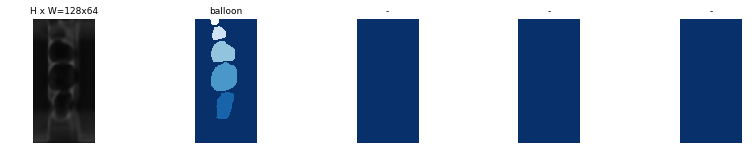

In [11]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [ ]:
model_path = 'D:/Segmentation_project/Final/mask_rcnn_balloon.h5'
#model_path = 'last'
balloon.train(CELL_DIR,model_path,'/content/drive/My Drive/logs4/')